In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('./ENet.h5')

In [5]:
X = np.load('./X.npy')
Y = np.load('./Y.npy')
import os
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tqdm import tqdm
print("Splitting into training and testing sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

Splitting into training and testing sets...


<Figure size 3000x3000 with 0 Axes>

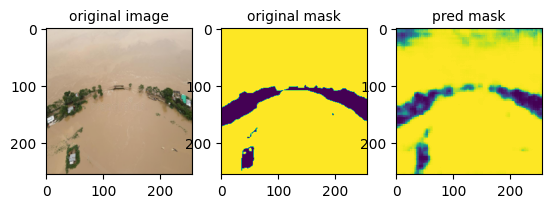

In [10]:
# displaying random image, mask, and predicted mask
import random

plt.figure(figsize=(30,30))

ind = random.randint(0, len(X_test))
img = X_test[ind]
predMask = model.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image", fontdict = {'fontsize' : 10})
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask", fontdict = {'fontsize' : 10})
ax2.imshow(np.squeeze(Y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask", fontdict = {'fontsize' : 10})
ax3.imshow(np.squeeze(predMask))

In [9]:
from sklearn.metrics import average_precision_score
try:
    import medpy
    from medpy.metric.binary import dc
    import cv2
except ImportError:
    !pip install medpy
    !pip install opencv-python
    import medpy
    from medpy.metric.binary import dc
    import cv2

dice_scores = []
iou_scores = []
ap_scores = []


if not os.path.exists("./ENetpredicted_masks"):
    os.makedirs("./ENetpredicted_masks")

for i in range(len(X_test)):
    img = X_test[i]
    predMask = model.predict(np.expand_dims(img, axis=0), verbose=0)
    #predMask = np.squeeze(predMask)
    #predMask = (predMask > 0.5).float()
    predMask = np.array(predMask > 0.5, dtype=np.float32)
    trueMask = Y_test[i]

    # Save predicted mask as .png file
    predMask = (predMask * 255).astype(np.uint8)
    filename = f"./ENetpredicted_masks/{i}.png"
    cv2.imwrite(filename, predMask)

    # Dice score
    dice = dc(predMask, trueMask)
    dice_scores.append(dice)

    # Dice score
    #intersection = np.logical_and(trueMask, predMask)
    #dice = (2. * intersection.sum()) / (trueMask.sum() + predMask.sum())
    #dice_scores.append(dice)

    # IoU score
    intersection = np.logical_and(trueMask, predMask)
    union = np.logical_or(trueMask, predMask)
    iou = intersection.sum() / union.sum()
    iou_scores.append(iou)

    # Average precision score
    ap = average_precision_score(trueMask.ravel(), predMask.ravel())
    ap_scores.append(ap)

# Compute mean scores
mean_dice_score = np.mean(dice_scores)
mean_iou_score = np.mean(iou_scores)
mean_ap_score = np.mean(ap_scores)

print(f"Mean Dice score: {mean_dice_score}")
print(f"Mean IoU score: {mean_iou_score}")
print(f"Mean Average Precision score: {mean_ap_score}")

     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/38.2 MB 4.6 MB/s eta 0:00:09
     - -------------------------------------- 1.0/38.2 MB 11.0 MB/s eta 0:00:04
     -- ------------------------------------- 2.7/38.2 MB 19.0 MB/s eta 0:00:02
     ---- ----------------------------------- 4.0/38.2 MB 21.3 MB/s eta 0:00:02
     ----- ---------------------------------- 5.0/38.2 MB 21.0 MB/s eta 0:00:02
     ------ --------------------------------- 6.2/38.2 MB 22.0 MB/s eta 0:00:02
     ------- -------------------------------- 7.3/38.2 MB 22.2 MB/s eta 0:00:02
     -------- ------------------------------- 8.6/38.2 MB 22.9 MB/s eta 0:00:02
     ---------- ----------------------------- 9.8/38.2 MB 23.3 MB/s eta 0:00:02
     ----------- --------------------------- 10.9/38.2 MB 26.2 MB/s eta 0:00:02
     ------------ -------------------------- 12.5/38.2 MB 27.3 MB/s eta 0:00:01
     ------------- ------------------------- 13.4